In [11]:
import numpy as np
import control as ct
import matplotlib.pyplot as plt
import scipy as sp

In [19]:
P = ct.tf([0.4], [1, 0.1, 20, 0.5])
print(P)

# Coefficients for the individual first-order terms in the numerator and denominator
num_first_order = [1, 11.2]
den_first_order = [1, 57]

# Creating the first-order transfer functions and raising them to the fourth power
num = ct.tf(num_first_order, [1])**4
den = ct.tf(den_first_order, [1])**4

# Controller gain
k_gain = 1835750

# Combine the terms to create the controller K(s)
K = k_gain * num / den

# Display the controller transfer function
print(K)


           0.4
--------------------------
s^3 + 0.1 s^2 + 20 s + 0.5


1.836e+06 s^4 + 8.224e+07 s^3 + 1.382e+09 s^2 + 1.032e+10 s + 2.889e+10
-----------------------------------------------------------------------
        s^4 + 228 s^3 + 1.949e+04 s^2 + 7.408e+05 s + 1.056e+07



Plot Gang of 4

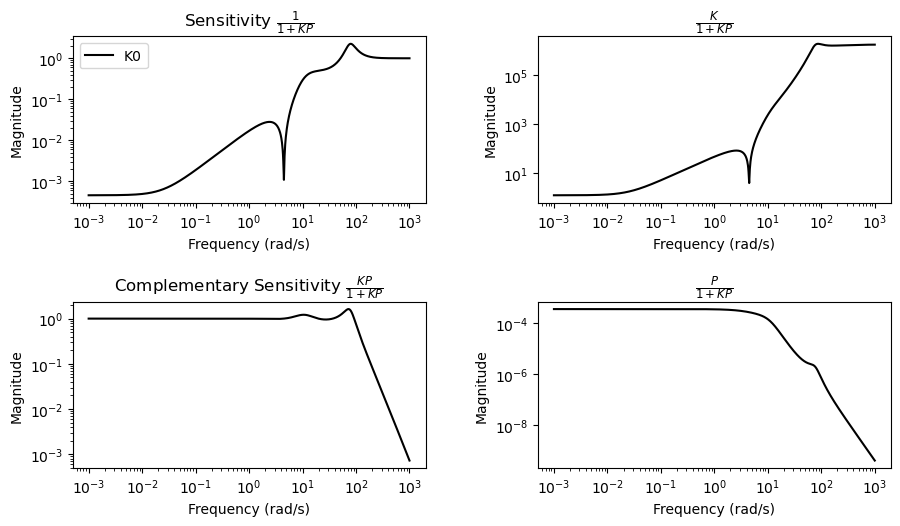

In [20]:
import enel441_utilities as eu
fig, ax = eu.plot_gang_of_four(P,[K]) #P is the plant, K is your controller

Step response of closed loop system

Text(0, 0.5, 'Elevation increase (m)')

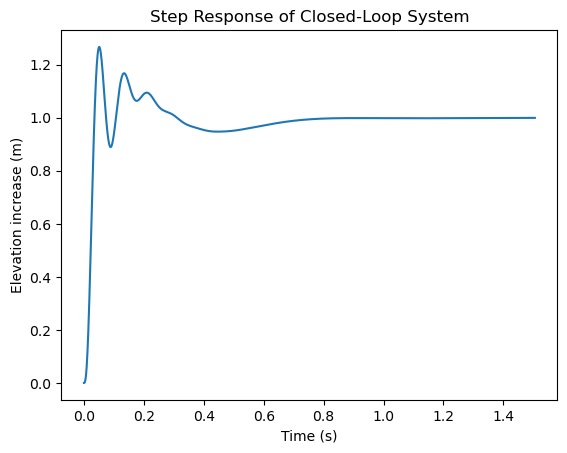

In [21]:
L = P*K
T = L/(1+L)
t,y = ct.step_response(T)
fig,ax = plt.subplots(1)
ax.plot(t,y)
ax.set_title('Step Response of Closed-Loop System')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Elevation increase (m)' )

Input an output of plant in response to a disturbance

Text(42.597222222222214, 0.5, 'Angle (degrees)')

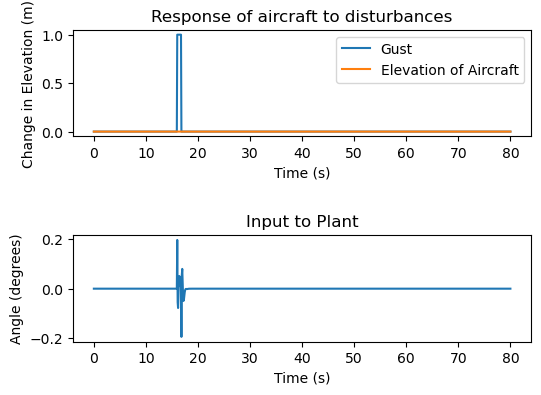

In [22]:
N = 1000
t = np.linspace(0,80,N)
S = 1/(1+P*K)
gust = np.zeros(N)
gust[200:210] = 1*np.ones(10)
t = np.linspace(0,80,N)

t,y = ct.forced_response(S*P,T=t,U=gust)
t,u = ct.forced_response(S,T=t,U=gust)
fig, ax = plt.subplots(2,1)
fig.tight_layout(pad=5.0)
ax[0].plot(t,gust, label='Gust')
ax[0].plot(t,y, label='Elevation of Aircraft')
ax[0].set_title('Response of aircraft to disturbances')
ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('Change in Elevation (m)')
ax[0].legend()
ax[1].plot(t,u, label='Elevator Angle')
ax[1].set_title('Input to Plant')
ax[1].set_xlabel('Time (s)')
ax[1].set_ylabel('Angle (degrees)')

Plot tracking of a specified flight pattern

Text(37.597222222222214, 0.5, 'Elevator Angle (degrees)')

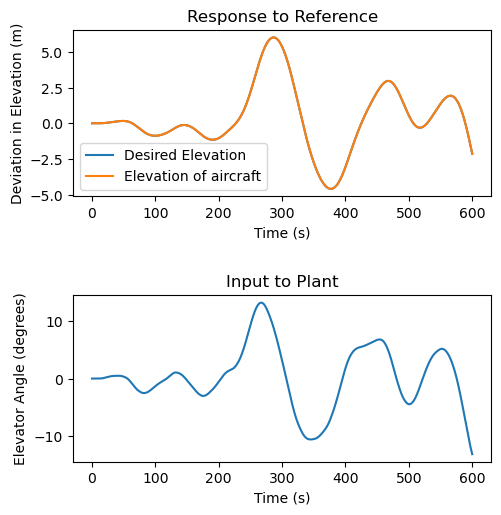

In [23]:
import scipy as sp
N = 10000
b1, a1 = sp.signal.butter(5, 0.001, 'low')
r = 100*sp.signal.lfilter(b1, a1, np.random.randn(N))

t = np.linspace(0,600,N)

t,y = ct.forced_response(T,T=t,U=r)
t,u = ct.forced_response(K*S,T=t,U=r)
fig, ax = plt.subplots(2,1, figsize=(6,6))
fig.tight_layout(pad=5.0)
ax[0].plot(t,r, label='Desired Elevation')
ax[0].plot(t,y, label='Elevation of aircraft')
ax[0].set_title('Response to Reference')
ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('Deviation in Elevation (m)')
ax[0].legend()

ax[1].plot(t,u, label='Elevator Angle')
ax[1].set_title('Input to Plant')
ax[1].set_xlabel('Time (s)')
ax[1].set_ylabel('Elevator Angle (degrees)')